---

### Dependencies Installation

---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

np.random.seed(2025)

---

### Dataset Download

---

In [ ]:
!wget -q -O ml-latest-small.zip https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
!unzip -q ml-latest-small.zip

---

### Data Extraction

---

In [ ]:
dataset = pd.read_csv('ml-latest-small/ratings.csv')

print(dataset.shape)
dataset.head()

(100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


---

### Dataset Statistics

---

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
dataset.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


---

### Ratings Matrix

---

In [ ]:
ratings_matrix = dataset.pivot_table(index='userId', columns='movieId', values='rating', fill_value=0)

print(ratings_matrix.shape)
ratings_matrix.head()

(610, 9724)


movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---

### Plots & Diagrams

---

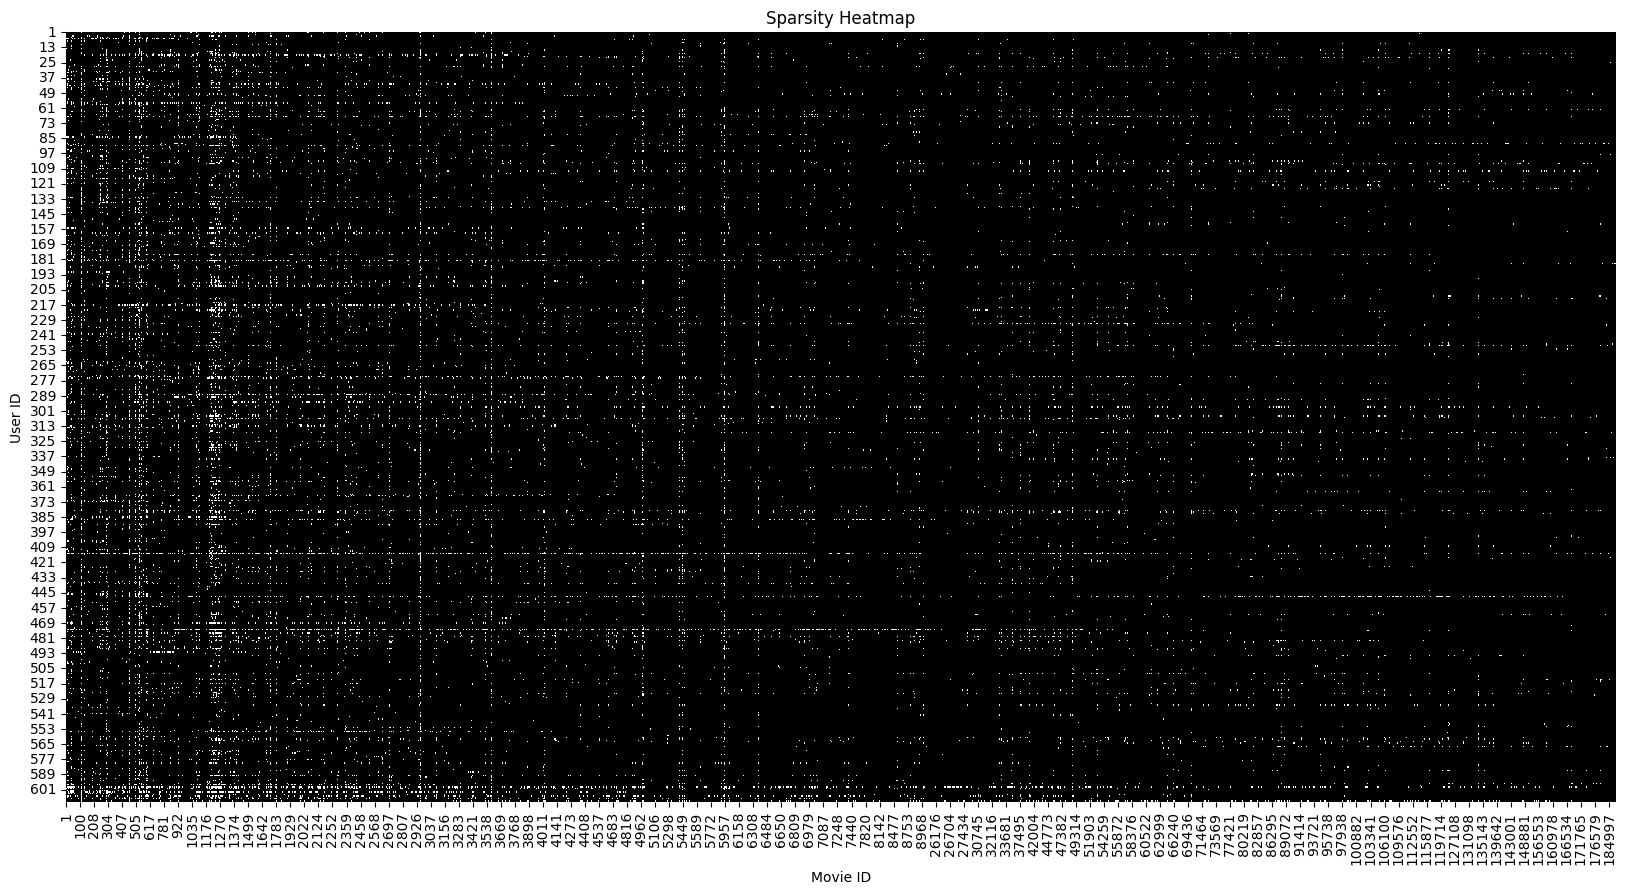

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap((ratings_matrix == 0), cbar=False, cmap="binary")
plt.title("Sparsity Heatmap")
plt.xlabel("Movie ID")
plt.ylabel("User ID")
plt.show()

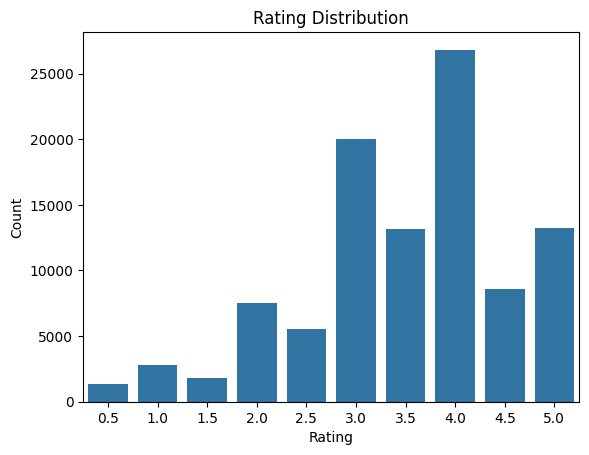

In [ ]:
sns.countplot(x='rating', data=dataset)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

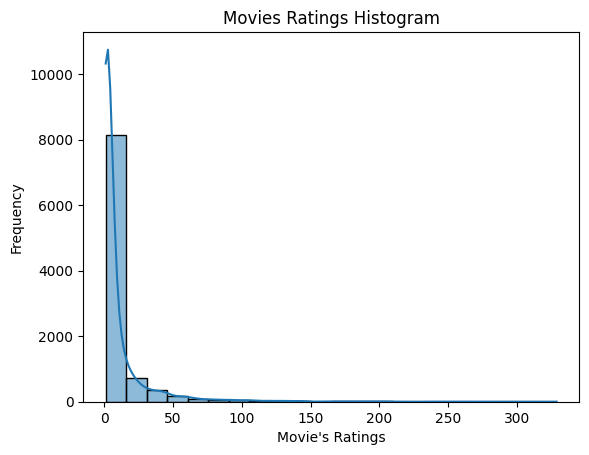

In [ ]:
sns.histplot(dataset.groupby('movieId').size(), bins='doane', kde=True)
plt.title("Movies Ratings Histogram")
plt.xlabel("Movie's Ratings")
plt.ylabel("Frequency")
plt.show()

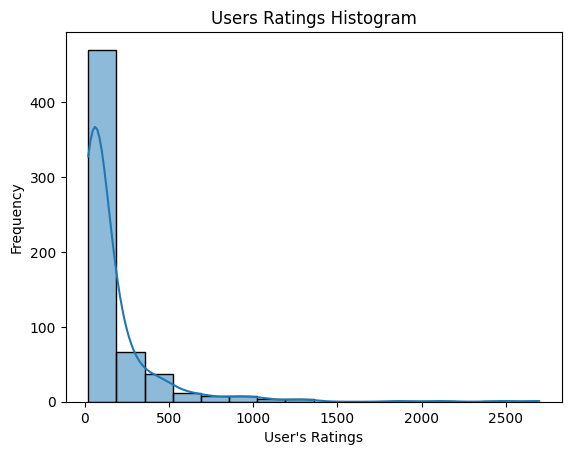

In [ ]:
sns.histplot(dataset.groupby('userId').size(), bins='doane', kde=True)
plt.title("Users Ratings Histogram")
plt.xlabel("User's Ratings")
plt.ylabel("Frequency")
plt.show()

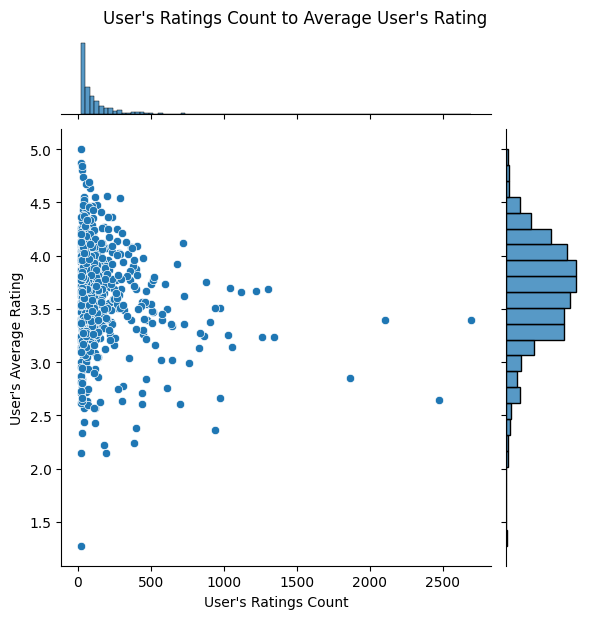

In [ ]:
user_stats = dataset.groupby('userId').agg({'rating': ['mean', 'count']})
user_stats.columns = ['rating_mean', 'rating_count']

g = sns.jointplot(data=user_stats, x='rating_count', y='rating_mean', kind='scatter')
g.set_axis_labels("User's Ratings Count", "User's Average Rating")
g.fig.suptitle("User's Ratings Count to Average User's Rating", y=1.025)
plt.show()

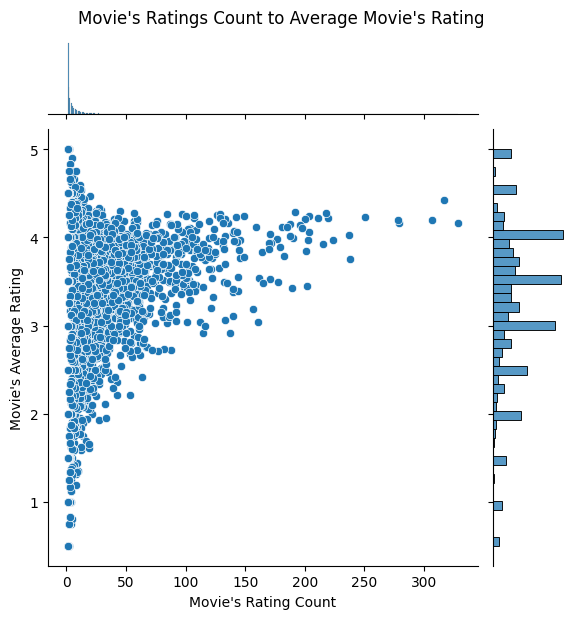

In [ ]:
movie_stats = dataset.groupby('movieId').agg({'rating': ['mean', 'count']})
movie_stats.columns = ['rating_mean', 'rating_count']

g = sns.jointplot(data=movie_stats, x='rating_count', y='rating_mean', kind='scatter')
g.set_axis_labels("Movie's Rating Count", "Movie's Average Rating")
g.fig.suptitle("Movie's Ratings Count to Average Movie's Rating", y=1.025)
plt.show()

---

### Implemented Algorhitms

---

In [ ]:
def solve_with_svd(ratings_matrix, k=20):
    AAT = np.dot(ratings_matrix, ratings_matrix.T)
    eigenvalues_U, U = np.linalg.eig(AAT)

    ATA = np.dot(ratings_matrix.T, ratings_matrix)
    eigenvalues_V, V = np.linalg.eig(ATA)

    singular_values = np.sqrt(np.abs(eigenvalues_V))

    sorted_indices_U = np.argsort(eigenvalues_U)[::-1]
    sorted_indices_V = np.argsort(eigenvalues_V)[::-1]

    U = U[:, sorted_indices_U]
    V = V[:, sorted_indices_V]
    singular_values = singular_values[sorted_indices_V]


    S = np.zeros_like(ratings_matrix, dtype=float)
    np.fill_diagonal(S, singular_values[:min(ratings_matrix.shape)])

    U_k = U[:, :k]
    S_k = S[:k, :k]
    V_k = V[:, :k]

    approx_matrix = np.dot(U_k, np.dot(S_k, V_k.T))

    return pd.DataFrame(approx_matrix, index=ratings_matrix.index, columns=ratings_matrix.columns)

In [ ]:
import scipy.sparse as sparse
from scipy.sparse.linalg import spsolve
from tqdm.notebook import tqdm

def solve_with_als(ratings_matrix):
    alpha_parameter = 40
    iterations = 10
    factors = 20
    regularization=0.1
    print(f"--- Running ALS with parameters: alpha: {alpha_parameter}, iterations: {iterations}, factors: {factors}, regularization coefficient: {regularization} ---")
    confidence_matrix = alpha_parameter * ratings_matrix
    num_users, num_items = confidence_matrix.shape[0], confidence_matrix.shape[1]

    random_state = np.random.RandomState(42)

    user_matrix = sparse.csr_matrix(random_state.normal(size=(num_users, factors)))  # Matrix: m x factors
    item_matrix = sparse.csr_matrix(random_state.normal(size=(num_items, factors)))  # Matrix: n x factors

    user_eye = sparse.eye(num_users)
    item_eye = sparse.eye(num_items)

    lambda_eye = regularization * sparse.eye(factors)

    for iter in tqdm(range(iterations)):
        print(f"Iteration #{iter}")
        userTuser = user_matrix.T.dot(user_matrix)
        itemTitem = item_matrix.T.dot(item_matrix)

        print("Solve users based on fixed items")
        for user in tqdm(range(num_users)):
            confidence_row = confidence_matrix.iloc[user].to_numpy()

            preference_vector = confidence_row.copy()
            preference_vector[preference_vector != 0] = 1

            confidence_row += 1

            CuI = sparse.diags(confidence_row, 0)

            itemTCuIitem = item_matrix.T.dot(CuI).dot(item_matrix)

            itemTCuPu = item_matrix.T.dot(CuI + item_eye).dot(preference_vector.T)

            user_matrix[user] = spsolve(itemTitem + itemTCuIitem + lambda_eye, itemTCuPu)

        print("Solve items based on fixed users")
        for item in tqdm(range(num_items)):
            confidence_row = confidence_matrix.T.iloc[item].to_numpy()

            preference_vector = confidence_row.copy()
            preference_vector[preference_vector != 0] = 1

            confidence_row += 1

            CiI = sparse.diags(confidence_row, 0)

            userTCiIuser = user_matrix.T.dot(CiI).dot(user_matrix)

            userTCiPi = user_matrix.T.dot(CiI + user_eye).dot(preference_vector.T)

            item_matrix[item] = spsolve(userTuser + userTCiIuser + lambda_eye, userTCiPi)

    return  pd.DataFrame(user_matrix.dot(item_matrix.T).toarray())

---

### Evaluation Metrics

---

In [ ]:
def compute_metrics(true_matrix, pred_matrix, mask):
    y_true = true_matrix.values[mask]
    y_pred = pred_matrix.values[mask]

    rmse = np.sqrt(np.mean((y_true - y_pred)**2))
    mae = np.mean(np.abs(y_true - y_pred))
    return rmse, mae

---

### Dataset Split

---

In [ ]:
observed_mask = dataset.pivot_table(
    index='userId',
    columns='movieId',
    values='rating',
    aggfunc=lambda x: True,
    fill_value=False
)

users, movies = np.where(observed_mask)
indices = np.random.permutation(len(users))
split = int(0.8 * len(indices))

train_mask = np.zeros_like(observed_mask, dtype=bool)
test_mask = np.zeros_like(observed_mask, dtype=bool)

for idx in indices[:split]:
    train_mask[users[idx], movies[idx]] = True

for idx in indices[split:]:
    test_mask[users[idx], movies[idx]] = True

train_matrix = ratings_matrix.copy()
train_matrix[test_mask] = 0

---

### Results Evaluation

---

In [ ]:
svd_predictions = solve_with_svd(train_matrix)

In [ ]:
als_predictions = solve_with_als(train_matrix)

--- Running ALS with parameters: alpha: 40, iterations: 10, factors: 20, regularization coefficient: 0.1 ---


  0%|          | 0/10 [00:00<?, ?it/s]

Iteration #0
Solve users based on fixed items


  0%|          | 0/610 [00:00<?, ?it/s]

Solve items based on fixed users


  0%|          | 0/9724 [00:00<?, ?it/s]

Iteration #1
Solve users based on fixed items


  0%|          | 0/610 [00:00<?, ?it/s]

Solve items based on fixed users


  0%|          | 0/9724 [00:00<?, ?it/s]

Iteration #2
Solve users based on fixed items


  0%|          | 0/610 [00:00<?, ?it/s]

Solve items based on fixed users


  0%|          | 0/9724 [00:00<?, ?it/s]

Iteration #3
Solve users based on fixed items


  0%|          | 0/610 [00:00<?, ?it/s]

Solve items based on fixed users


  0%|          | 0/9724 [00:00<?, ?it/s]

Iteration #4
Solve users based on fixed items


  0%|          | 0/610 [00:00<?, ?it/s]

Solve items based on fixed users


  0%|          | 0/9724 [00:00<?, ?it/s]

Iteration #5
Solve users based on fixed items


  0%|          | 0/610 [00:00<?, ?it/s]

Solve items based on fixed users


  0%|          | 0/9724 [00:00<?, ?it/s]

Iteration #6
Solve users based on fixed items


  0%|          | 0/610 [00:00<?, ?it/s]

Solve items based on fixed users


  0%|          | 0/9724 [00:00<?, ?it/s]

Iteration #7
Solve users based on fixed items


  0%|          | 0/610 [00:00<?, ?it/s]

Solve items based on fixed users


  0%|          | 0/9724 [00:00<?, ?it/s]

Iteration #8
Solve users based on fixed items


  0%|          | 0/610 [00:00<?, ?it/s]

Solve items based on fixed users


  0%|          | 0/9724 [00:00<?, ?it/s]

Iteration #9
Solve users based on fixed items


  0%|          | 0/610 [00:00<?, ?it/s]

Solve items based on fixed users


  0%|          | 0/9724 [00:00<?, ?it/s]

In [ ]:
results = []
algorithms = {
    'SVD': svd_predictions,
    'ALS': als_predictions
}

for algo_name, pred_matrix in algorithms.items():
    train_rmse, train_mae = compute_metrics(ratings_matrix, pred_matrix, train_mask)
    test_rmse, test_mae = compute_metrics(ratings_matrix, pred_matrix, test_mask)

    results.append({
        'Algorithm': algo_name,
        'Train RMSE': f"{abs(train_rmse):.4f}",
        'Test RMSE': f"{abs(test_rmse):.4f}",
        'Train MAE': f"{abs(train_mae):.4f}",
        'Test MAE': f"{abs(test_mae):.4f}"
    })

results_df = pd.DataFrame(results).set_index('Algorithm')
print(results_df[['Test RMSE', 'Test MAE', 'Train RMSE', 'Train MAE']])

          Test RMSE Test MAE Train RMSE Train MAE
Algorithm                                        
SVD          3.0524   2.7889     2.9840    2.6946
ALS          2.7245   2.5324     2.7154    2.5211
